In [1]:
# Загрузка необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Загрузка исходного файла для работы
df = pd.read_excel('C:/Users/Test/Documents/DS/notebooks/udocan/Register_10.04.2023.xlsx')  # ДАТА в имени!

In [9]:
# Общая информация по запросам
number_open_total = len(df[df['TQS_Состояние'] == 'Открыт'])
number_open_PO_1 = len(df[(df['TQS_Состояние'] == 'Открыт')  \
    & (df['TQS_Проектный офис'] == 'UMCD - ПО-1')  \
    & (df['TQS_РПИ_наименование'] != 'СПб-Гипрошахт')])
open_CD_PO_1 = len(df[(df['TQS_Состояние'] == 'Открыт')  \
    & (df['TQS_Проектный офис'] == 'UMCD - ПО-1')  \
    & (df['TQS_Статус'] == 'На проверке ДС')])
closed_yesterday_PO_1 = len(df[(df['TQS_Состояние'] == 'Закрыт')  \
    & (df['TQS_Проектный офис'] == 'UMCD - ПО-1')  \
    & (df['TQS_Закрыт'] == '04.09.2023')])  #  ДАТА!
recieved_yesterday_PO_1 = len(df[(df['TQS_Проектный офис'] == 'UMCD - ПО-1')  \
    & (df['TQS_Создан'] == '04.09.2023')])  #  ДАТА!

In [10]:
# Дф с открытыми запросами по каждому напавлению
opened_Civil_PO_1 = df[(df['TQS_Состояние'] == 'Открыт')  \
    & (df['TQS_Проектный офис'] == 'UMCD - ПО-1')  \
    & ((df['TQS_Статус'] == 'На отработке ПП')  \
    | (df['TQS_Статус'] == 'На проверке ПП'))  \
    & ((df['TQS_Чего касается TQS'] == 'Архитектурные решения')  \
    | (df['TQS_Чего касается TQS'] == 'Конструкции металлические')  \
    | (df['TQS_Чего касается TQS'] == 'Общее')  \
    | (df['TQS_Чего касается TQS'] == 'Общестрой'))]
opened_ELE_PO_1 = df[(df['TQS_Состояние'] == 'Открыт')  \
    & (df['TQS_Проектный офис'] == 'UMCD - ПО-1')  \
    & ((df['TQS_Статус'] == 'На отработке ПП')  \
    | (df['TQS_Статус'] == 'На проверке ПП'))  \
    & (df['TQS_Чего касается TQS'] == 'Электрика')]
opened_INS_PO_1 = df[(df['TQS_Состояние'] == 'Открыт')  \
    & (df['TQS_Проектный офис'] == 'UMCD - ПО-1')  \
    & ((df['TQS_Статус'] == 'На отработке ПП')  \
    | (df['TQS_Статус'] == 'На проверке ПП'))  \
    & (df['TQS_Чего касается TQS'] == 'КИПиА')]
opened_HVAC_PO_1 = df[(df['TQS_Состояние'] == 'Открыт')  \
    & (df['TQS_Проектный офис'] == 'UMCD - ПО-1')  \
    & ((df['TQS_Статус'] == 'На отработке ПП')  \
    | (df['TQS_Статус'] == 'На проверке ПП'))  \
    & (df['TQS_Чего касается TQS'] == 'ОВКВ')]
opened_PIP_PO_1 = df[(df['TQS_Состояние'] == 'Открыт')  \
    & (df['TQS_Проектный офис'] == 'UMCD - ПО-1')  \
    & ((df['TQS_Статус'] == 'На отработке ПП')  \
    | (df['TQS_Статус'] == 'На проверке ПП'))  \
    & ((df['TQS_Чего касается TQS'] == 'Компоновка / Трубопроводы')  \
    | (df['TQS_Чего касается TQS'] == 'ВК'))]
opened_EQ_PO_1 = df[(df['TQS_Состояние'] == 'Открыт')  \
    & (df['TQS_Проектный офис'] == 'UMCD - ПО-1')  \
    & ((df['TQS_Статус'] == 'На отработке ПП')  \
    | (df['TQS_Статус'] == 'На проверке ПП'))  \
    & (df['TQS_Чего касается TQS'] == 'Оборудование')]

In [11]:
# Вывод общей информации
print("Итого открыто 'по больнице':", number_open_total)
print('Открыто ПО-1 / % от общего :', number_open_PO_1, '/', round(number_open_PO_1 / number_open_total * 100))
print('На рассмотрении у ДС ПО-1: ', open_CD_PO_1)
print('Вчера ПО-1: Получено / Закрыто / Разница:', recieved_yesterday_PO_1,  \
      '/', closed_yesterday_PO_1, '/', closed_yesterday_PO_1-recieved_yesterday_PO_1)
print('*'*20)
print('Итого открыто ПО-1:')
print('Общестрой:   ', len(opened_Civil_PO_1))
print('Оборудование:', len(opened_EQ_PO_1))
print('Трубопроводы:', len(opened_PIP_PO_1))
print('ОВКВ:        ', len(opened_HVAC_PO_1))
print('КИПиА:       ', len(opened_INS_PO_1))
print('Электрика:   ', len(opened_ELE_PO_1))

Итого открыто 'по больнице': 267
Открыто ПО-1 / % от общего : 197 / 74
На рассмотрении у ДС ПО-1:  14
Вчера ПО-1: Получено / Закрыто / Разница: 10 / 3 / -7
********************
Итого открыто ПО-1:
Общестрой:    78
Оборудование: 6
Трубопроводы: 18
ОВКВ:         1
КИПиА:        4
Электрика:    23


In [9]:
# Корректируем ДФ (заводим нужные нам колонки) + сохраняем каждый отдельный файл по направлениям
opened_Civil_PO_1 = opened_Civil_PO_1[['Имя', 'TQS_Тема запроса', 'TQS_Номер по генплану', 'TQS_Создан']]
opened_Civil_PO_1.to_excel('Открытые_Общестрой_ПО-1_01.01.2023.xlsx', index = False)  # ДАТА в имени!
opened_ELE_PO_1 = opened_ELE_PO_1[['Имя', 'TQS_Тема запроса', 'TQS_Номер по генплану', 'TQS_Создан']]
opened_ELE_PO_1.to_excel('Открытые_Электрика_ПО-1_01.01.2023.xlsx', index = False)  # ДАТА в имени!
opened_INS_PO_1 = opened_INS_PO_1[['Имя', 'TQS_Тема запроса', 'TQS_Номер по генплану', 'TQS_Создан']]
opened_INS_PO_1.to_excel('Открытые_КИПиА_ПО-1_01.01.2023.xlsx', index = False)  # ДАТА в имени!
opened_HVAC_PO_1 = opened_HVAC_PO_1[['Имя', 'TQS_Тема запроса', 'TQS_Номер по генплану', 'TQS_Создан']]
opened_HVAC_PO_1.to_excel('Открытые_ОВКВ_ПО-1_01.01.2023.xlsx', index = False)  # ДАТА в имени!
opened_PIP_PO_1 = opened_PIP_PO_1[['Имя', 'TQS_Тема запроса', 'TQS_Номер по генплану', 'TQS_Создан']]
opened_PIP_PO_1.to_excel('Открытые_Трубопроводы_ПО-1_01.01.2023.xlsx', index = False)  # ДАТА в имени!
opened_EQ_PO_1 = opened_EQ_PO_1[['Имя', 'TQS_Тема запроса', 'TQS_Номер по генплану', 'TQS_Создан']]
opened_EQ_PO_1.to_excel('Открытые_Оборудование_ПО-1_01.01.2023.xlsx', index = False)  # ДАТА в имени!

In [7]:
# Разработаем статистику по закрытым запросам
df_closed = df[df['Длительность отработки запроса']>=0]

In [8]:
# Обшщая информация
print("Среднее арифметическое / медиана срока ответа 'по больнице':", round(df_closed['Длительность отработки запроса'].mean(),1) , '/', round(df_closed['Длительность отработки запроса'].median(), 1))
print('Среднее арифметическое / медиана срока ответа ПО-1:         ', round(df_closed[df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1']['Длительность отработки запроса'].mean(), 1), '/',  \
      df_closed[df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1']['Длительность отработки запроса'].median())
print('*'*30)
print('Среднее арифметическое / медиана срока ответа ПО-1 по дисциплинам:')
print('Общестрой:   ', round(df_closed[(df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1') & ((df_closed['TQS_Чего касается TQS'] == 'Архитектурные решения') |  \
    (df_closed['TQS_Чего касается TQS'] == 'Конструкции металлические') |  \
    (df_closed['TQS_Чего касается TQS'] == 'Общее') |  \
    (df_closed['TQS_Чего касается TQS'] == 'Общестрой'))]  \
    ['Длительность отработки запроса'].mean(), 1), '/', 
    df_closed[(df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1') & ((df_closed['TQS_Чего касается TQS'] == 'Архитектурные решения') |  \
    (df_closed['TQS_Чего касается TQS'] == 'Конструкции металлические') |  \
    (df_closed['TQS_Чего касается TQS'] == 'Общее') |  \
    (df_closed['TQS_Чего касается TQS'] == 'Общестрой'))]  \
    ['Длительность отработки запроса'].median())
print('Оборудование:', round(df_closed[(df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1') & (df_closed['TQS_Чего касается TQS'] == 'Оборудование')]['Длительность отработки запроса'].mean(), 1), '/',  \
    df_closed[(df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1') & (df_closed['TQS_Чего касается TQS'] == 'Оборудование')]['Длительность отработки запроса'].median())
print('Трубопроводы:', round(df_closed[(df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1') & (df_closed['TQS_Чего касается TQS'] == 'Компоновка / Трубопроводы')]['Длительность отработки запроса'].mean(), 1), '/',  \
    df_closed[(df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1') & (df_closed['TQS_Чего касается TQS'] == 'Компоновка / Трубопроводы')]['Длительность отработки запроса'].median())
print('ОВКВ:        ', round(df_closed[(df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1') & (df_closed['TQS_Чего касается TQS'] == 'ОВКВ')]['Длительность отработки запроса'].mean(), 1), '/',  \
    df_closed[(df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1') & (df_closed['TQS_Чего касается TQS'] == 'ОВКВ')]['Длительность отработки запроса'].median())
print('КИПиА:       ', round(df_closed[(df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1') & (df_closed['TQS_Чего касается TQS'] == 'КИПиА')]['Длительность отработки запроса'].mean(), 1), '/',  \
    df_closed[(df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1') & (df_closed['TQS_Чего касается TQS'] == 'КИПиА')]['Длительность отработки запроса'].median())
print('Электрика:   ', round(df_closed[(df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1') & (df_closed['TQS_Чего касается TQS'] == 'Электрика')]['Длительность отработки запроса'].mean(), 1), '/',  \
    df_closed[(df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1') & (df_closed['TQS_Чего касается TQS'] == 'Электрика')]['Длительность отработки запроса'].median())

Среднее арифметическое / медиана срока ответа 'по больнице': 12.1 / 6.0
Среднее арифметическое / медиана срока ответа ПО-1:          11.6 / 6.0
******************************
Среднее арифметическое / медиана срока ответа ПО-1 по дисциплинам:
Общестрой:    11.7 / 7.0
Оборудование: 11.7 / 6.0
Трубопроводы: 9.8 / 5.0
ОВКВ:         11.6 / 4.5
КИПиА:        11.8 / 5.0
Электрика:    11.1 / 5.0


In [15]:
# Далее не трогать!
# Таблица с данными открытых запросов каждый день - Создание таблицы
data_opened = {'date' : '10.03.2023',  \
              'total' : number_open_PO_1,  \
              'civil' : len(opened_Civil_PO_1),  \
              'eqp' : len(opened_EQ_PO_1),  \
              'pip' : len(opened_PIP_PO_1),  \
              'hvac' : len(opened_HVAC_PO_1),  \
              'ins' : len(opened_INS_PO_1),  \
              'ele' : len(opened_ELE_PO_1)}

In [17]:
# Далее не трогать!
# Первичное создание и сохранение дф
opened_per_day_PO1 = pd.DataFrame([data_opened])
opened_per_day_PO1.to_excel('Открытые_ПО-1_по_дисциплинам.xlsx', index = False)

In [19]:
# Загружаем файл, который уже лежит на компе
opened_per_day_PO1_new = pd.read_excel('C:/Users/Test/Documents/DS/notebooks/udocan/Открытые_ПО-1_по_дисциплинам.xlsx')

In [23]:
# Добавляем строку в ДФ через словарь / Сразу выгружаем файл
# Запускать один раз!
opened_per_day_PO1_new = opened_per_day_PO1_new.append(data_opened, ignore_index=True)
opened_per_day_PO1_new.to_excel('Открытые_ПО-1_по_дисциплинам.xlsx', index = False)

C:\Users\Test\AppData\Local\Temp\ipykernel_10824\3841765157.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  opened_per_day_PO1_new = opened_per_day_PO1_new.append(data_opened, ignore_index=True)


# Графика

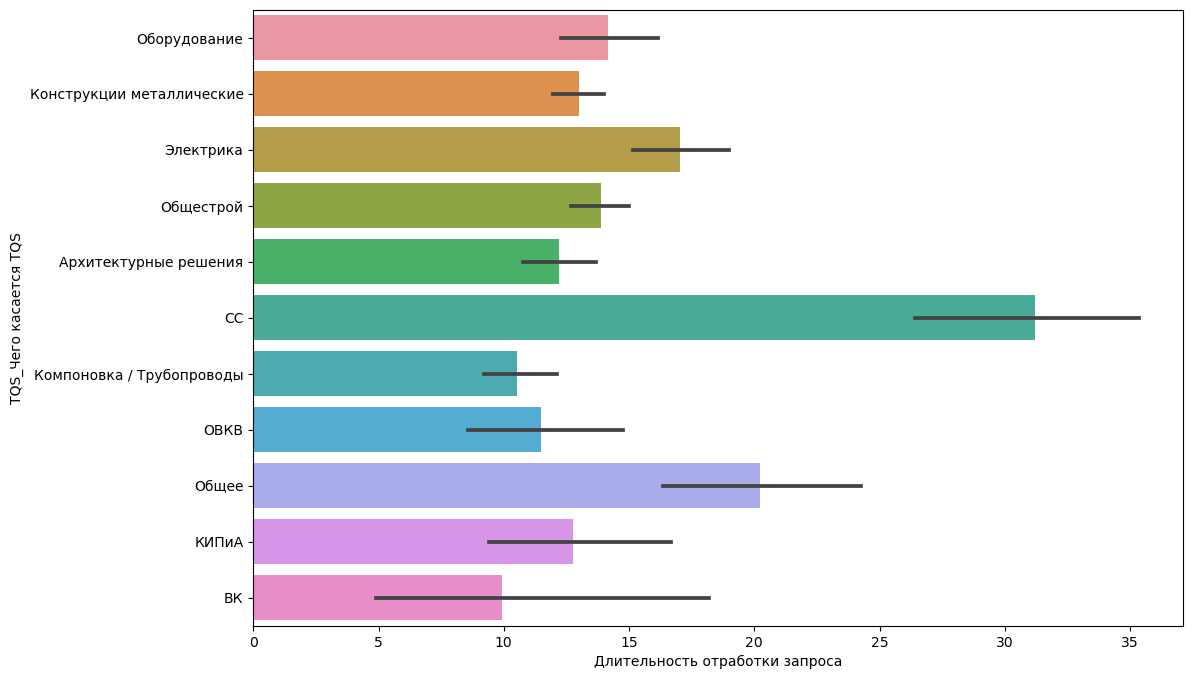

In [25]:
# Барплот ПО-1 / Срок отработки / дисциплина
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Длительность отработки запроса', y = 'TQS_Чего касается TQS',  \
            data = df_closed[df_closed['TQS_Проектный офис'] == 'UMCD - ПО-1'])
plt.savefig('Барплот_ПО-1.jpg')

In [26]:
# Подумать над этим графиком. Суммарная цифра по каждой дисциплине
sns.countplot(df['Дисциплина'])

KeyError: 'Дисциплина'

<AxesSubplot:xlabel='TQS_Чего касается TQS', ylabel='Длительность отработки запроса'>

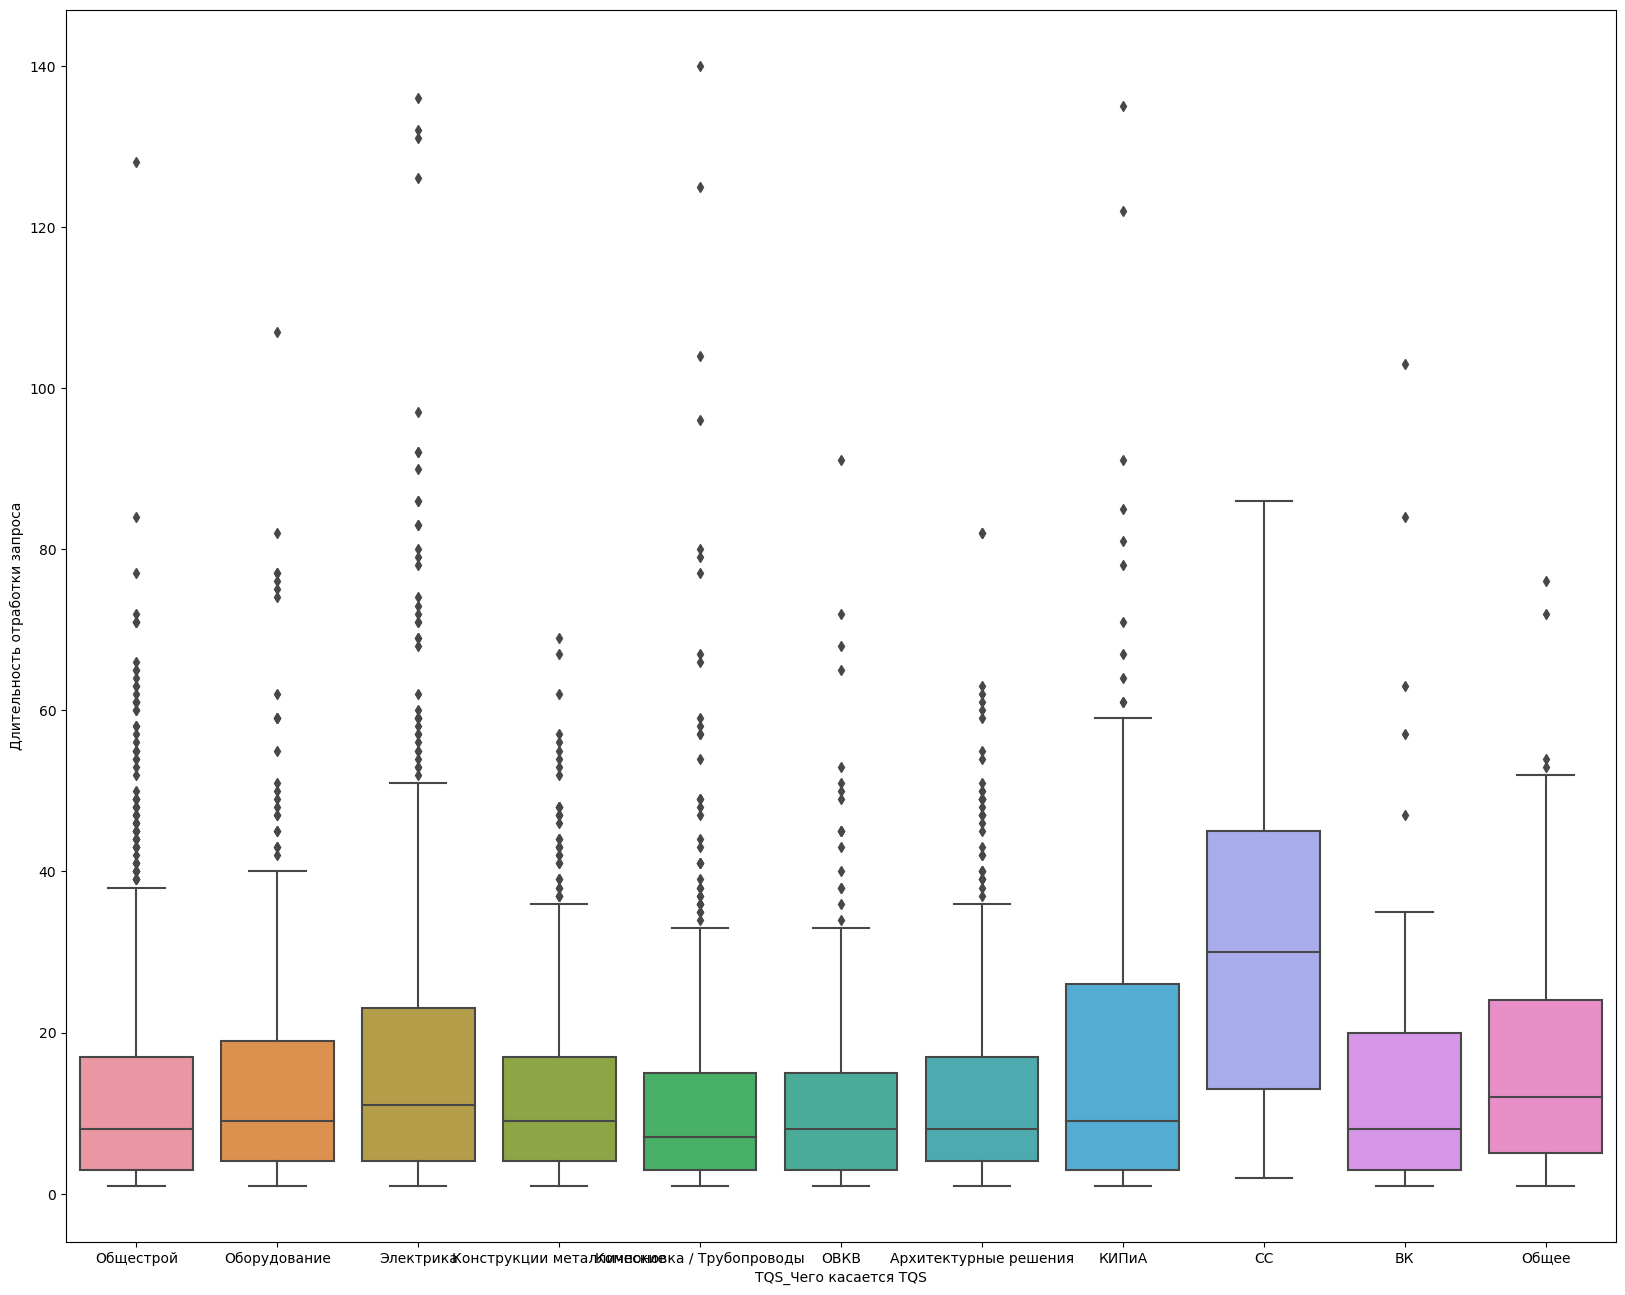

In [27]:
# Боксплот
plt.figure(figsize=(20,16))
sns.boxplot(x='TQS_Чего касается TQS', y='Длительность отработки запроса', data=df)

<AxesSubplot:xlabel='TQS_Проектный офис', ylabel='Длительность отработки запроса'>

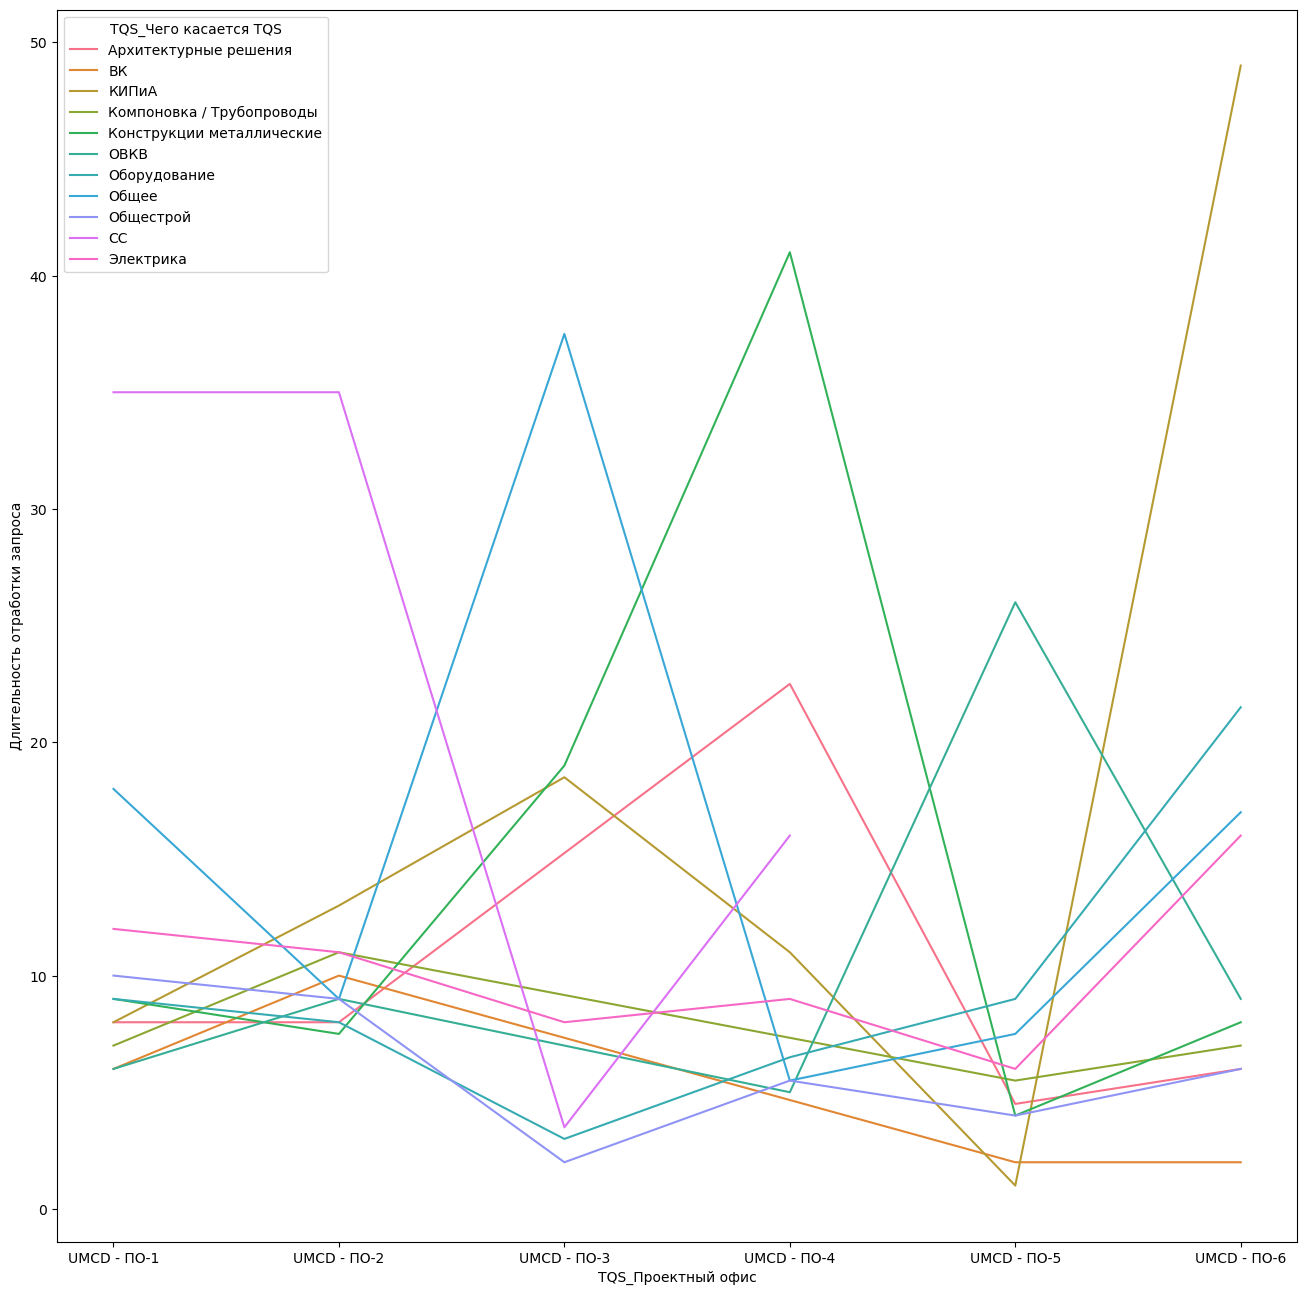

In [28]:
# lineplot
plt.figure(figsize=(16,16))
data = df.groupby(['TQS_Проектный офис', 'TQS_Чего касается TQS'], as_index = False).agg({'Длительность отработки запроса' : 'median'})
sns.lineplot(data=data, x='TQS_Проектный офис', y='Длительность отработки запроса', hue='TQS_Чего касается TQS')